In [2]:
import pandas as pd
import numpy as np
import os
import traceback
np.seterr(all="ignore")
#--- user libs
import utility as utl
import imp
imp.reload(utl)

<module 'utility' from '/Users/Home/Desktop/Tmp/txt/git/DislocationAvalanches/nanoindentation/avalancheAnalysis/utility.py'>

# set parameters
## load curves

In [50]:
path = '/Users/Home/Desktop/Tmp/txt/git/DislocationAvalanches/nanoindentation/loadCurves'
dirs = '10 mN'
inputFiles = os.listdir('%s/%s'%(path,dirs))
print('inputFiles=',np.array(inputFiles))




inputFiles= ['Stal_310S_virgin_10mN_15x 10 5000 -1818.txt'
 'Stal_310S_virgin_10mN_15x 11 5000 -1798.txt'
 'Stal_310S_virgin_10mN_15x 1 5000 -1998.txt'
 'Stal_310S_virgin_10mN_15x 9 5000 -1838.txt'
 'Stal_310S_virgin_10mN_15x 14 5000 -1738.txt'
 'Stal_310S_virgin_10mN_15x 4 5000 -1938.txt'
 'Stal_310S_virgin_10mN_15x 6 5000 -1898.txt'
 'Stal_310S_virgin_10mN_15x 13 5000 -1758.txt'
 'Stal_310S_virgin_10mN_15x 3 5000 -1958.txt'
 'Stal_310S_virgin_10mN_15x 8 5000 -1858.txt'
 'Stal_310S_virgin_10mN_15x 12 5000 -1778.txt'
 'Stal_310S_virgin_10mN_15x 2 5000 -1978.txt'
 'Stal_310S_virgin_10mN_15x 7 5000 -1878.txt'
 'Stal_310S_virgin_10mN_15x 15 5000 -1718.txt'
 'Stal_310S_virgin_10mN_15x 5 5000 -1918.txt']


In [61]:
def GetIndentLabel(strr):
    indxi=strr.find('x')+2
    indxf=strr.find('5000')
    return strr[indxi:indxf-1]

indentLabels = list(map(lambda x:GetIndentLabel(x),inputFiles))

## ebsd maps

In [51]:
#--- assign grain to each indent

grainLabel = {}

loadID = '10mN'
grainLabel[loadID] = {}
grainLabel[loadID]['1']=84
grainLabel[loadID]['2']=326
grainLabel[loadID]['3']=326
grainLabel[loadID]['4']=326
grainLabel[loadID]['5']=490
grainLabel[loadID]['6']=495
grainLabel[loadID]['7']=619
grainLabel[loadID]['8']=615
grainLabel[loadID]['9']=664
grainLabel[loadID]['10']=704
grainLabel[loadID]['11']=766
grainLabel[loadID]['12']=863
grainLabel[loadID]['13']=863
grainLabel[loadID]['14']=980
grainLabel[loadID]['15']=1009

#--- output
keys = list(grainLabel[loadID].keys())
vals=list(map(lambda x:grainLabel[loadID][x],keys))
np.savetxt('grain_labels_%s.txt'%loadID,np.c_[keys,vals].astype(int),
           header='Indent\tgrainLabel',
           fmt='%i',
          )

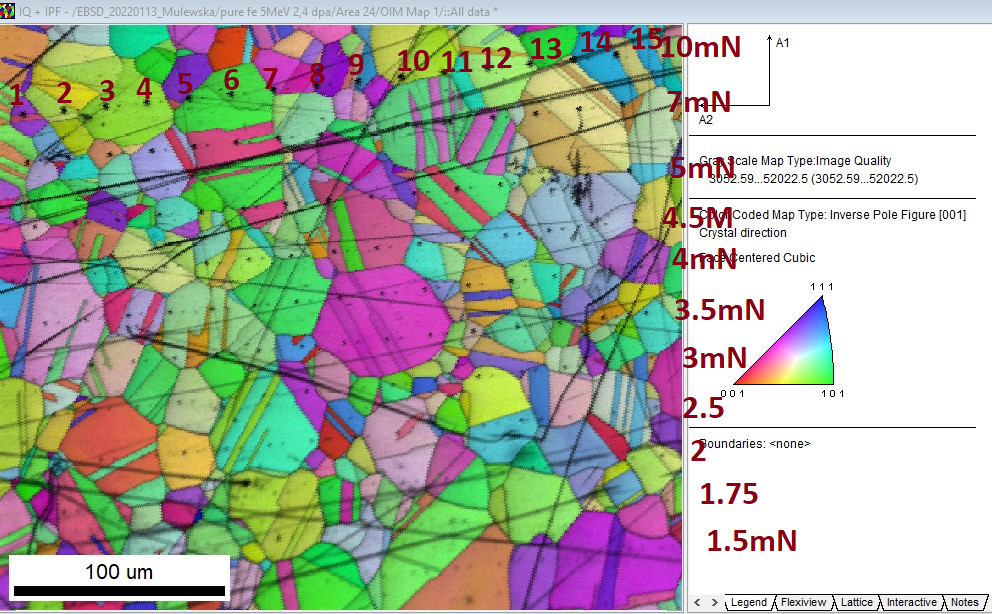

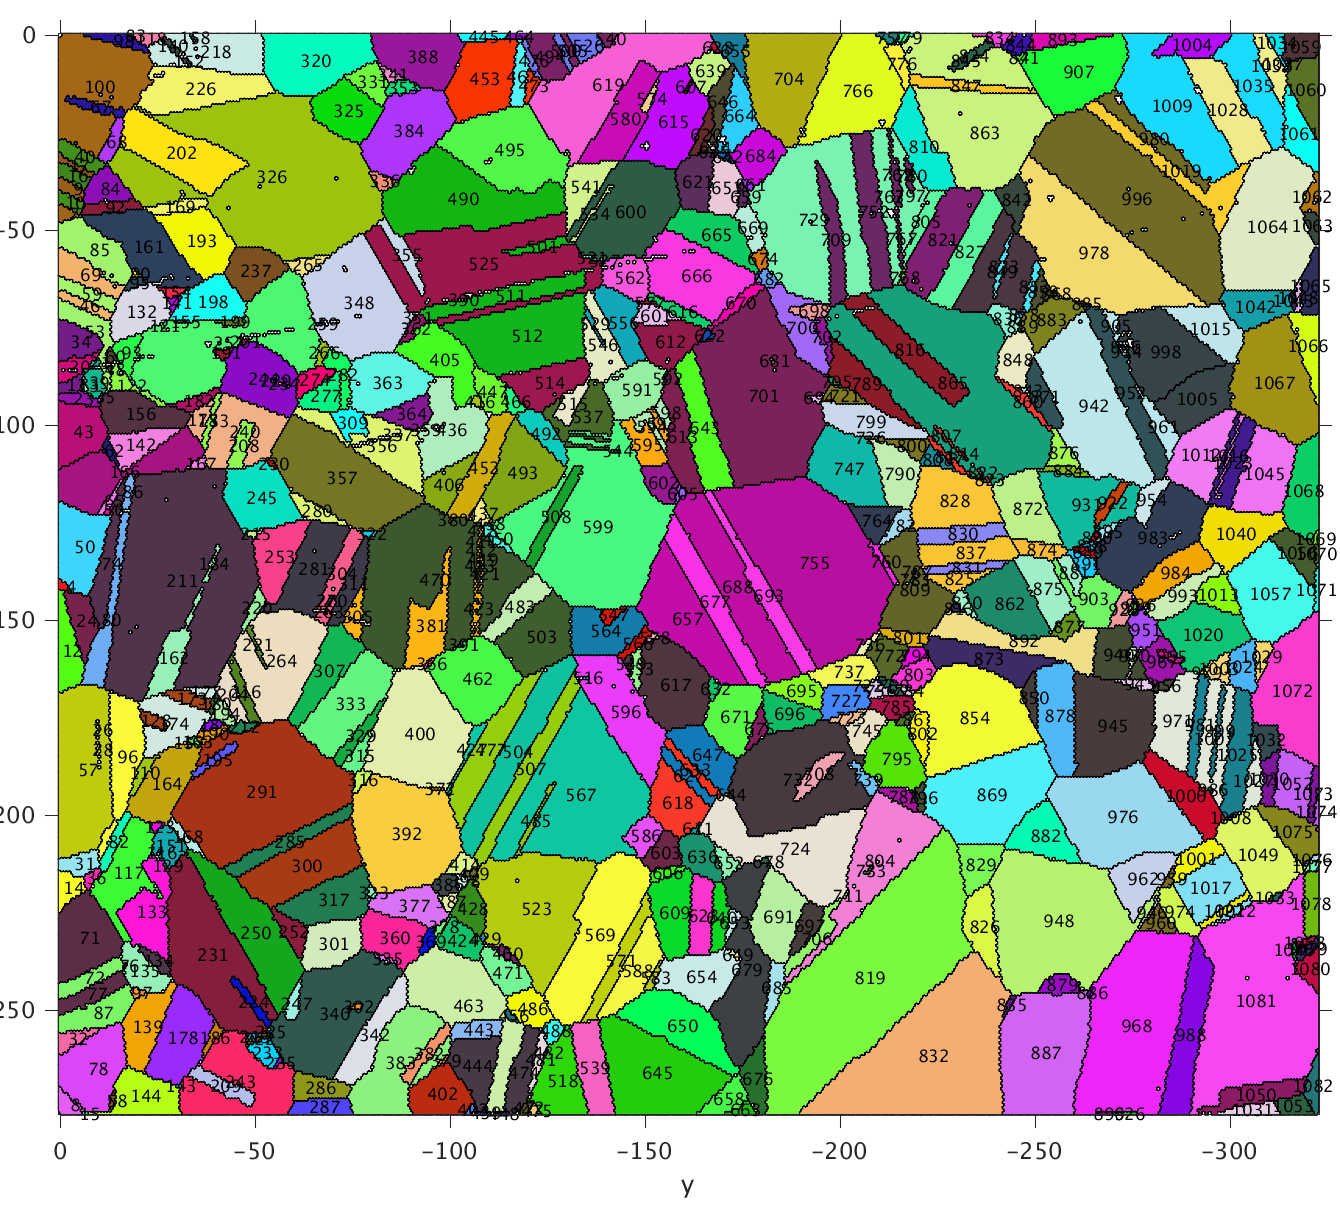

# Parse load curves

In [52]:
#--- read input file
loadTimeSeries = list(map(lambda x:pd.read_csv('%s/%s/%s'%(path,dirs,x),
                 sep='\t',index_col=False,names=['Time','Depth','Force']),inputFiles))
#--- derivative
loadTimeSeries = list(map(lambda x:pd.DataFrame(np.c_[x,np.gradient(x.Depth,x.Time)],columns=['Time','Depth','Force','Rate']),loadTimeSeries))
loadTimeSeries[1] #--- index indicates the indenter location

,Time,Depth,Force,Rate
0,0.000000,-378.881283,-0.011805,inf
1,0.000000,-347.048853,-0.010896,NaN
2,0.000000,-306.519232,-0.009987,NaN
3,0.000000,-273.177339,-0.009074,NaN
4,0.000000,-253.201000,-0.008165,NaN
...,...,...,...,...
325,77.265605,364.456655,0.311713,-21.290525
326,77.315576,363.102221,0.211515,-31.317298
327,77.365584,361.325271,0.112295,-32.428162
328,77.415115,359.871406,0.012457,-37.079970


# Plot timeseries

indent label:3, grain label:326


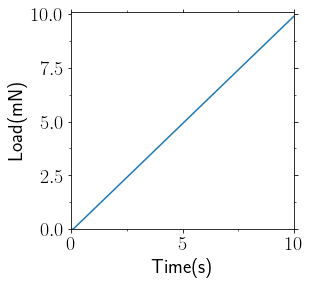

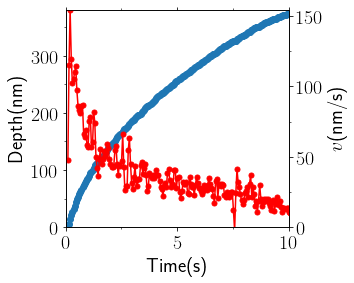

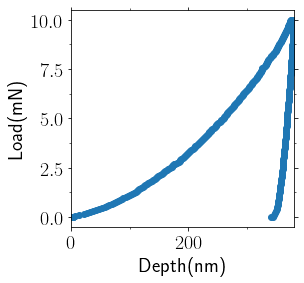

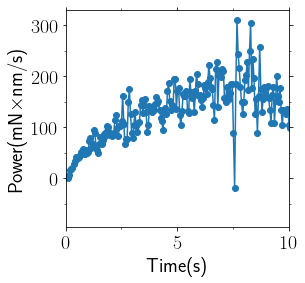

<AxesSubplot:xlabel='Time(s)', ylabel='Power(mN$\\times$nm/s)'>

In [73]:
#--- set limits
index = 8#2 #8 #5 #8
ld = loadTimeSeries[ index ]
print('indent label:%s, grain label:%s'%(indentLabels[index],grainLabel[loadID][indentLabels[index]]))

#--- time
tlo = 0
thi = 10 #ld.Time.max()
#--- load
flo = 0
fhi = 1.01*ld.Force.max()
#--- depth
hlo = 0.0
hhi = ld.Depth.max()
#--- velocity
vlo = 0.0
vhi = ld.Rate[ld.Rate!=np.inf].max()

#--- load vs. time
utl.PltErr(ld.Time, ld.Force,
           attrs={'fmt':'-'},
           xlim=(tlo,thi),
           ylim=(flo,fhi),
           xstr=r'Time(s)',
           ystr=r'Load(mN)',
           title='force_time.png'
          )

#--- depth vs. time
ax = utl.PltErr(ld.Time, ld.Depth,
           xlim=(tlo,thi),
           ylim=(hlo,hhi),
           xstr=r'Time(s)',
           ystr=r'Depth(nm)',
           Plot=False,
          )

#--- velocity vs. time
utl.PltErr(ld.Time, ld.Rate,
           xlim=(tlo,thi),
           ylim=(vlo,vhi),
#           xstr=r'Time',
           ystr=r'$v$(nm/s)',
           attrs={'fmt':'-r.','markersize':10},
           Plot = True,
           twinx = True,
           ax=ax,
#           yscale='log'
           title='depth_time.png'
          )


#--- load vs. depth
utl.PltErr(ld.Depth, ld.Force,
           xlim=(hlo,hhi),
#            ylim=(0,0.4),
           xstr=r'Depth(nm)',
           ystr=r'Load(mN)',
           title='load_depth.png'
          )

#--- power vs. time
utl.PltErr(ld.Time, ld.Force * ld.Rate,
           xlim=(tlo,thi),
#            ylim=(0,1),
           xstr=r'Time(s)',
           ystr=r'Power(mN$\times$nm/s)',
           title='power_time.png'
          )

# Avalanche statistics

## Power distributions

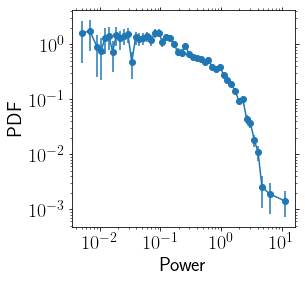

<AxesSubplot:xlabel='Power', ylabel='PDF'>

In [30]:
def GetPower(ld,tlo,thi):
    filtr = np.all([ld.Time>tlo,ld.Time<thi],axis=0)
    value = (ld.Force*ld.Rate)[filtr]
    return (value[ value > 0.0 ]).to_list()

value = np.concatenate(list(map(lambda x:GetPower(x,tlo,thi), loadTimeSeries)))
hist, edge, err = utl.GetPDF(value, n_per_decade=16, linscale=None)

utl.PltErr(edge, hist, yerr=err,
#           xlim=(tlo,thi),
#            ylim=(0,0.4),
           ystr=r'PDF',
           xstr=r'Power',
           xscale = 'log',
           yscale='log',
           title='power_hist.png'
          )

## Avalanche size

In [18]:
def Wrapper(ld,tlo,thi,lambdc):
    '''
    return avalanche sizes given force timeseries and initial and final times
    '''
    
#    print(np.min(GetPower(ld,tlo,thi)))
    
    #--- data frame storing avalanche attributes
    filtr = np.all([ld.Time>tlo,ld.Time<thi],axis=0)

    df_avl = utl.GetAvl( np.array(ld.Time[filtr]), np.array(ld.Force*ld.Rate)[filtr], lambdc)
    #df_avl = GetAvalKunMethod( broken_bonds,  5) #tcrltn )

    #--- save
    # df_fltrd = DataFrameSubSet( df_avl, #--- filter
    #                               'ti', 
    #                               ( 0, tavl ) ) 
    # df_fltrd.to_pickle('df_avl.pk')

#    display( df_avl.sort_values( by = 'size',ascending = False) )
#    print ('n.avls = %s'%len(df_avl))
    return df_avl['size'].to_list()
    
lambdc = 0.1 #--- threshold
sizes = np.concatenate(list(map(lambda x:Wrapper(x,tlo,thi,lambdc), loadTimeSeries)))

### accumulated

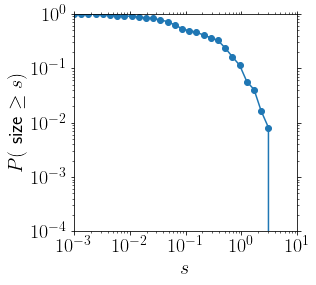

<AxesSubplot:xlabel='$s$', ylabel='$P($ size $\\ge s)$'>

In [19]:
hist, edge = utl.GetPDF(sizes, ACCUM = True, n_per_decade=8, linscale=None)

utl.PltErr(edge[:-1], 1-hist,
           xlim=(1e-3,1e1),
            ylim=(1e-4,1),
           ystr=r'$P($ size $\ge s)$',
           xstr=r'$s$',
           xscale = 'log',
           yscale='log'
          )

### pdf

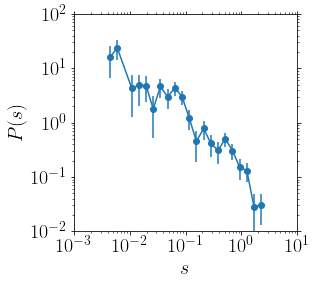

<AxesSubplot:xlabel='$s$', ylabel='$P(s)$'>

In [20]:
hist, edge, err = utl.GetPDF(sizes, n_per_decade=8, linscale=None)

utl.PltErr(edge, hist, yerr=err,
           xlim=(1e-3,1e1),
            ylim=(1e-2,1e2),
           ystr=r'$P(s)$',
           xstr=r'$s$',
           xscale = 'log',
           yscale='log'
          )

### vary threshold

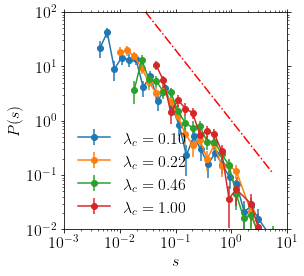

In [35]:
def varyThreshold(loadTimeSeries, tlo, thi, lambdc):
    return np.concatenate(list(map(lambda x:Wrapper(x,tlo,thi,lambdc), loadTimeSeries)))

lambdc = np.logspace(np.log10(1.0e-1),np.log10(1.0e0),4)
size_lambdc = list(map(lambda x:varyThreshold(loadTimeSeries, tlo, thi, x),lambdc))

#--- distributions
hists = list(map(lambda x: utl.GetPDF(x, n_per_decade=8, linscale=None), size_lambdc))


for item, threshold, indx in zip(hists, lambdc, range(len(hists))):
    hist, edge, err = item
    if indx == 0:
        ax = utl.PltErr(edge, hist, yerr=err,
                        Plot = False,
                        legend = True,
                        label=r'$\lambda_c=%3.2f$'%threshold,
                  )
        ax = utl.PltErr(edge, 1/edge**1.3,
                        Plot = False,
                        fmt = '-.r',
                        ax = ax,
#                        legend = True,
#                        label=r'$\lambda_c=%3.2f$'%threshold,
                  )
    else:
        ax = utl.PltErr(edge, hist, yerr=err,
                        xlim=(1e-3,1e1),
                       ylim=(1e-2,1e2),
                       ystr=r'$P(s)$',
                       xstr=r'$s$',
                       xscale = 'log',
                       yscale='log',
                       Plot = False,
                       ax=ax,
                       label=r'$\lambda_c=%3.2f$'%threshold,
                        legend = True,
                        loc=3,
                        fontsize=16,
                       title='avalanche_size.png'
                      )